<a href="https://colab.research.google.com/github/Nazneen-akram/coursera-rep/blob/main/chapter04_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [3]:
from tensorflow.keras.datasets import imdb

(train0_data, train0_labels), (test0_data, test0_labels) = imdb.load_data(
    num_words=10000)

In [4]:
train0_data.shape

(25000,)

Modifying the initial scheme (instead 25k each, making 40k, 10k train, test)

In [5]:
import numpy as np
train_data = np.concatenate((train0_data, test0_data[:15000]),axis=0)
train_labels = np.concatenate((train0_labels, test0_labels[:15000]),axis=0)

test_data   = test0_data[15000:]
test_labels = test0_labels[15000:]

In [6]:
train_data.shape, test_data.shape

((40000,), (10000,))

In [7]:
len(train_data), len(test_data)

(40000, 10000)

In [8]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

**Decoding reviews back to text**

In [10]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [12]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):  #sample axis
        for j in sequence:  # sequence axis (all encoded numbers)
            results[i, j] = 1.    # e.g. if sample=0, and 1st number in sequence=5, then results[0,5]=1.

    return results

In [13]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
#print(train_data[0])
print(x_train[0,4613])

1.0


In [16]:
#vectorize your labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [18]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

Method_1

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
partial_x_train.shape, x_val.shape

((30000, 10000), (10000, 10000))

Method_2

In [18]:
#Most efficient way to randomize the inputs by using indices randomization
def data_split(inputs, targets, ratio: int):

    rIdx = np.random.permutation(len(inputs))
    shuffled_inputs = inputs[rIdx]
    shuffled_targets = targets[rIdx]

    # used for train/valid split
    num_validation_samples = int(ratio * len(inputs))

    val_inputs = shuffled_inputs[:num_validation_samples]
    val_targets = shuffled_targets[:num_validation_samples]

    train_inputs = shuffled_inputs[num_validation_samples:]
    train_targets = shuffled_targets[num_validation_samples:]

    return train_inputs, val_inputs, train_targets, val_targets

In [19]:
partial_x_train, x_val, partial_y_train, y_val = data_split(x_train, y_train, 0.25)

In [20]:
partial_x_train.shape, x_val.shape

((30000, 10000), (10000, 10000))

Method 3

In [21]:
from sklearn.model_selection import train_test_split

partial_x_train, x_val, partial_y_train, y_val = \
    train_test_split(x_train, y_train,
                     test_size=0.25,
                     random_state=104,
                     shuffle=True)

In [22]:
partial_x_train.shape, x_val.shape

((30000, 10000), (10000, 10000))

**Training your model**

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
59/59 [==============================] - 4s 52ms/step - loss: 0.4480 - accuracy: 0.8165 - val_loss: 0.3125 - val_accuracy: 0.8797
Epoch 2/20
59/59 [==============================] - 2s 31ms/step - loss: 0.2557 - accuracy: 0.9031 - val_loss: 0.2923 - val_accuracy: 0.8830
Epoch 3/20
59/59 [==============================] - 2s 32ms/step - loss: 0.2060 - accuracy: 0.9209 - val_loss: 0.2985 - val_accuracy: 0.8843
Epoch 4/20
59/59 [==============================] - 3s 47ms/step - loss: 0.1810 - accuracy: 0.9314 - val_loss: 0.2939 - val_accuracy: 0.8842
Epoch 5/20
59/59 [==============================] - 2s 40ms/step - loss: 0.1566 - accuracy: 0.9406 - val_loss: 0.2981 - val_accuracy: 0.8876
Epoch 6/20
59/59 [==============================] - 2s 32ms/step - loss: 0.1416 - accuracy: 0.9478 - val_loss: 0.3137 - val_accuracy: 0.8856
Epoch 7/20
59/59 [==============================] - 2s 31ms/step - loss: 0.1247 - accuracy: 0.9547 - val_loss: 0.3311 - val_accuracy: 0.8816
Epoch 8/20
59

In [22]:
results = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6592 - accuracy: 0.8763


#Plotting the training and validation loss

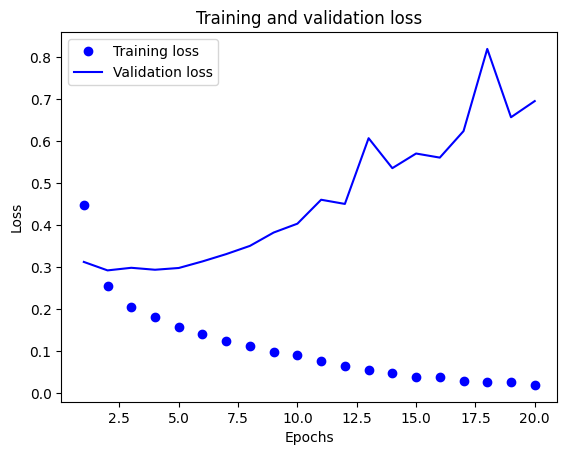

In [23]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the training and validation accuracy

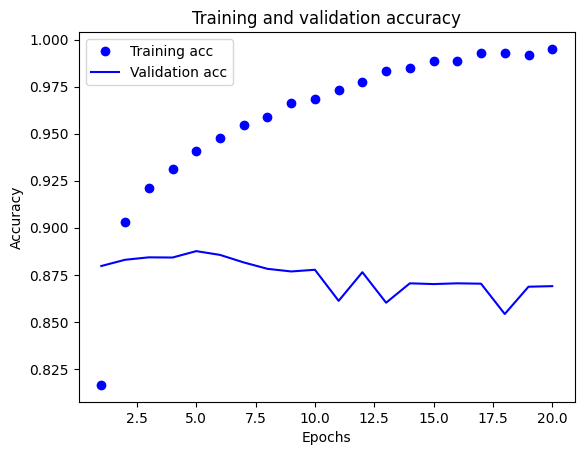

In [24]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [1]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in test0_data[4]])

NameError: ignored

##the training loss decreases with every epoch, and the training accuracy increases with every epoch.that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch.A model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfitting: after the fourth epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set. In this case, to prevent overfitting, you could stop training after four epochs.

In [25]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [26]:
results
#test0_data[0]

[0.6591657996177673, 0.8762999773025513]

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

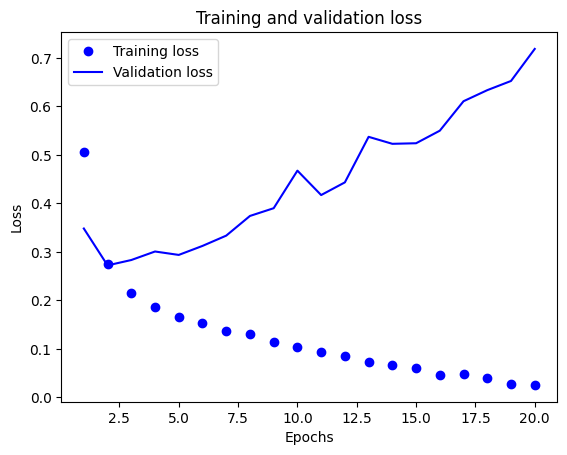

In [29]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

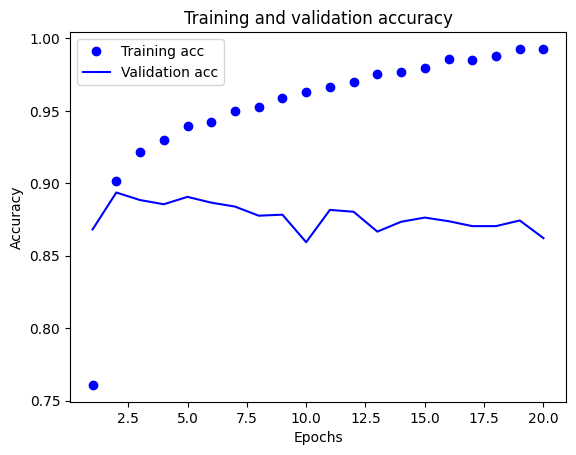

In [30]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

In [ ]:
results

### Using a trained model to generate predictions on new data

In [ ]:
predictions = model.predict(x_test)

In [ ]:
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in test_data[4]])
decoded_review

In [ ]:
predictions[4]

In [ ]:
test_labels[4]

### Further experiments